In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

## Interaction Count Plot

In [357]:
df = pd.read_csv('364_interaction_energies.txt', sep='\t')

In [8]:
display(df)

,index,PDBID,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,...,7.67_intenergysum,7.67_inttype1,7.67_intenergy1,7.67_inttype2,7.67_intenergy2,7.68_intenergysum,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2
0,1,7EW2,-999,NaN,-999,NaN,-999,-999,NaN,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
1,2,7EW3,-999,NaN,-999,NaN,-999,-999,NaN,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
2,3,7EW4,-999,NaN,-999,NaN,-999,-999,NaN,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
3,4,7EW1,-999,NaN,-999,NaN,-999,-999,NaN,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
4,5,7LD4,-999,NaN,-999,NaN,-999,-999,NaN,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,387,5C1M,-999,NaN,-999,NaN,-999,-999,NaN,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
360,388,4EJ4,-999,NaN,-999,NaN,-999,-999,NaN,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
361,389,4DKL,-999,NaN,-999,NaN,-999,-999,NaN,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
362,390,6Z10,-999,NaN,-999,NaN,-999,-999,NaN,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999


In [362]:
# find residues where interactions are made

# get columns with 'sum' in their name
sum_cols = [col for col in df.columns if 'sum' in col]

# create empty lists for column counts and residue numbers
int_counts = []
resnums = []

# loop through sum columns and count interactions that don't have -999 energies
for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)
    count = len(df.loc[df[col] != -999])
    int_counts.append(count)

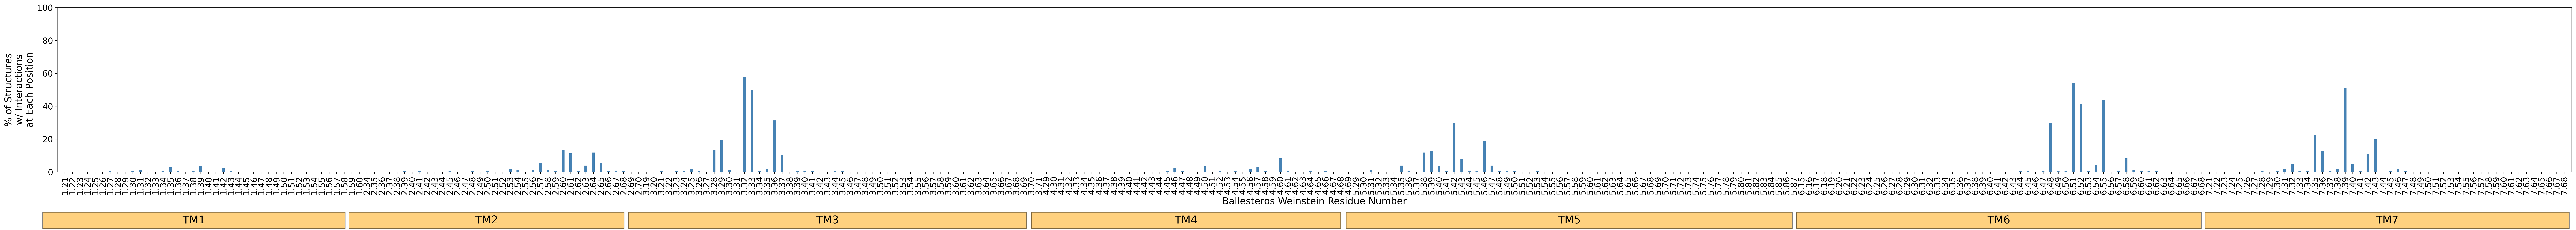

In [386]:
# 60 x 5 interaction % plot
matplotlib.rcParams['figure.figsize'] = [60, 5] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)
x = np.arange(len(resnums))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# calculate interaction counts as percentages
int_counts_percs = []
for x in int_counts:
    int_counts_percs.append((x/364)*100)
    
# create rectangles for bar plot
rects = ax.bar(resnums, int_counts_percs, width, label=resnums, color = 'steelblue')

# Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
ax.set_ylabel('% of Structures\nw/ Interactions\nat Each Position', fontsize = 16)
ax.set_xlabel('Ballesteros Weinstein Residue Number', fontsize = 16)
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
ax.set_ylim([0, 100])
fig.tight_layout()

# add TM labels
plt.figtext(0.076, -0.05, "                                        TM1                                        ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.1894, -0.05, "                                    TM2                                    ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.3215, -0.05, "                                                      TM3                                                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.4605, -0.05, "                                         TM4                                         ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.609, -0.05, "                                                             TM5                                                             ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.7755, -0.05, "                                                       TM6                                                       ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.926, -0.05, "                                                 TM7                                                 ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# stop leftmost bar from crowding x axis
plt.xlim([-1,len(resnums)])
plt.show()

fig.savefig('364_int_perc_plot.jpg', bbox_inches='tight')

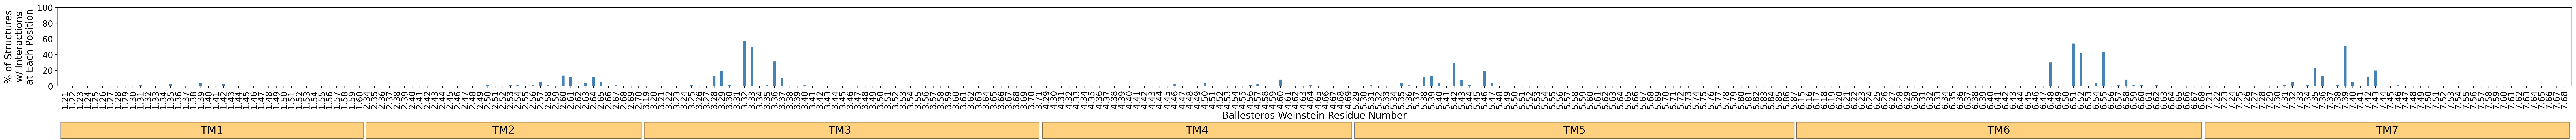

In [387]:
# 60 x 3 interaction % plot for PPT
matplotlib.rcParams['figure.figsize'] = [60, 3] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)

x = np.arange(len(resnums))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# calculate interaction counts as percentages
int_counts_percs = []
for x in int_counts:
    int_counts_percs.append((x/364)*100)

# create rectangles for bar plot
rects = ax.bar(resnums, int_counts_percs, width, label=resnums, color = 'steelblue')

# Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
ax.set_ylabel('% of Structures\nw/ Interactions\nat Each Position', fontsize = 16)
ax.set_xlabel('Ballesteros Weinstein Residue Number', fontsize = 16)
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
ax.set_ylim([0, 100])
fig.tight_layout()

# add TM labels
plt.figtext(0.083, -0.05, "                                        TM1                                        ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.196, -0.05, "                                    TM2                                    ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.327, -0.05, "                                                     TM3                                                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.4648, -0.05, "                                         TM4                                         ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.611, -0.05, "                                                            TM5                                                            ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.7755, -0.05, "                                                       TM6                                                       ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.926, -0.05, "                                                 TM7                                                 ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# stop leftmost bar from crowding x axis
plt.xlim([-1,len(resnums)])
plt.show()

fig.savefig('364_int_perc_plot_60x3.jpg', bbox_inches='tight')

---
## Residue Positions vs. Interaction Type Frequency

In [204]:
inttype_cols = [col for col in df.columns if 'inttype' in col]

In [340]:
# get per residue count of each interaction type

resnums = []
int_types = []
residue_int_counts = []
prior_resnum = 'res'

# get interaction type columns
inttype_cols = [col for col in df.columns if 'inttype' in col]

for col in inttype_cols:
    resnum = col[:4]
    
    # if dealing with a new residue (inttype1 columns)
    if resnum != prior_resnum:
        resnums.append(resnum)
        int_type_dict = {}
        col_values = df[col].unique() # get unique values from interaction type column
        col_values = [x for x in col_values if not pd.isnull(x)] # remove na values from list containing interaction type column
    
        counts = list((df[col].value_counts()))
        #print(counts)
        if len(col_values) > 0:
            print(resnum, col_values, counts)
            for x in col_values:
                if x not in int_types: # get unique interaction types
                    int_types.append(x)
                int_type_dict[x] = counts[col_values.index(x)] # create dictionary with per residue counts of each interaction
        else:
            print(resnum, [], 0)
            
    # if dealing with the same residue (inttype2 columns)        
    else:
        col_values = df[col].unique() # get unique values from interaction type column
        col_values = [x for x in col_values if not pd.isnull(x)] # remove na values from list containing interaction type column
        
        counts = list((df[col].value_counts()))
        if len(col_values) > 0:
            print(resnum, col_values, counts)
            for x in col_values:
                if x not in int_types: # get unique interaction types
                    int_types.append(x)
                if x in int_type_dict: # if the interaction type is already in the dictionary
                    int_type_dict[x] += counts[col_values.index(x)] # create dictionary with per residue counts of each interaction
                   # print(int_type_dict) # check to see that interaction type counts are being added properly
        else:
            print(resnum, [], 0)
        
        residue_int_counts.append(int_type_dict)
    prior_resnum = resnum

#print(int_types)

# create list with sublists for interaction type counts
int_counts = [[] for _ in range(len(int_types))]

# loop through each int. type and int. count dictionary to count the number of interactions per type, per structure
for count_dict in residue_int_counts:    
    for type in int_types:
        if type in count_dict:
            int_counts[int_types.index(type)].append(count_dict[type])
        else:
            int_counts[int_types.index(type)].append(0) # if the key doesn't exist in count_dict, append 0 since no interaction of that type is made
            
#print(int_counts)

int_type_count_dict = dict(zip(int_types, int_counts))

print(int_type_count_dict)
            

1.21 [] 0
1.21 [] 0
1.22 [] 0
1.22 [] 0
1.23 [] 0
1.23 [] 0
1.24 [] 0
1.24 [] 0
1.25 [] 0
1.25 [] 0
1.26 [] 0
1.26 [] 0
1.27 ['Hbond'] [1]
1.27 ['Arene'] [1]
1.28 [] 0
1.28 [] 0
1.29 [] 0
1.29 [] 0
1.30 ['Hbond'] [2]
1.30 ['Hbond'] [1]
1.31 ['Hbond'] [5]
1.31 ['Hbond', 'Ionic'] [4, 1]
1.32 [] 0
1.32 [] 0
1.33 [] 0
1.33 [] 0
1.34 ['Hbond'] [2]
1.34 [] 0
1.35 ['Arene', 'Hbond'] [6, 4]
1.35 ['Hbond'] [2]
1.36 ['Hbond'] [1]
1.36 [] 0
1.37 [] 0
1.37 [] 0
1.38 ['Arene'] [2]
1.38 [] 0
1.39 ['Hbond'] [15]
1.39 ['Hbond', 'Arene'] [1, 1]
1.40 [] 0
1.40 [] 0
1.41 [] 0
1.41 [] 0
1.42 ['Hbond', 'Arene'] [5, 3]
1.42 ['Hbond'] [4]
1.43 ['Hbond'] [2]
1.43 ['Arene'] [1]
1.44 [] 0
1.44 [] 0
1.45 [] 0
1.45 [] 0
1.46 [] 0
1.46 [] 0
1.47 [] 0
1.47 [] 0
1.48 [] 0
1.48 [] 0
1.49 [] 0
1.49 [] 0
1.50 [] 0
1.50 [] 0
1.51 [] 0
1.51 [] 0
1.52 [] 0
1.52 [] 0
1.53 [] 0
1.53 [] 0
1.54 [] 0
1.54 [] 0
1.55 [] 0
1.55 [] 0
1.56 [] 0
1.56 [] 0
1.57 [] 0
1.57 [] 0
1.58 [] 0
1.58 [] 0
1.59 [] 0
1.59 [] 0
1.60 [] 0
1.60 [] 

In [343]:
sum(int_type_count_dict['Hbond'])

1775

In [345]:
int_types

['Hbond', 'Arene', 'Ionic', 'Covalent']

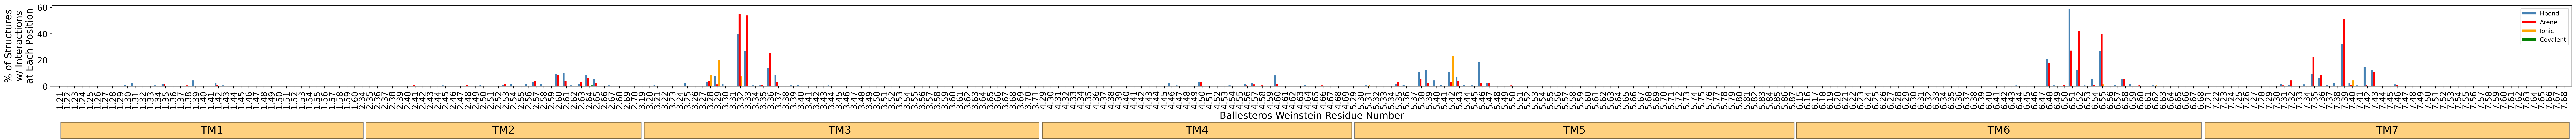

In [388]:
# 60 x 3 interaction % plot for PPT
matplotlib.rcParams['figure.figsize'] = [60, 3] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)

width = 0.25  # the width of the bars

fig, ax = plt.subplots()

# calculate interaction counts as percentages
sublists = []
for x in int_type_count_dict: # get lists key values as lists
    sublists.append(int_type_count_dict[x])
    
Hbond_int_count_percs = []
Arene_int_count_percs = []
Ionic_int_count_percs = []
Covalent_int_count_percs = []

for x in sublists[0]:
    Hbond_int_count_percs.append((x/364)*100)
    
for x in sublists[1]:
    Arene_int_count_percs.append((x/364)*100)

for x in sublists[2]:
    Ionic_int_count_percs.append((x/364)*100)

for x in sublists[3]:
    Covalent_int_count_percs.append((x/364)*100)

x = np.arange(len(resnums))

# create rectangles for bar plot
rects1 = ax.bar(x - (width*1.5), Hbond_int_count_percs, width, label=resnums, color = 'steelblue')
rects2 = ax.bar(x - (width/2), Arene_int_count_percs, width, label=resnums, color = 'red')
rects3 = ax.bar(x + (width/2), Ionic_int_count_percs, width, label=resnums, color = 'orange')
rects4 = ax.bar(x + (width*1.5), Covalent_int_count_percs, width, label=resnums, color = 'green')

# Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
ax.set_ylabel('% of Structures\nw/ Interactions\nat Each Position', fontsize = 16)
ax.set_xlabel('Ballesteros Weinstein Residue Number', fontsize = 16)
ax.set_xticks(x)
ax.set_xticklabels(resnums, rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)

# Add Legend
custom_lines = [Line2D([0], [0], color='steelblue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='green', lw=4)]

ax.legend(custom_lines, ['Hbond', 'Arene', 'Ionic', 'Covalent'])


#ax.set_ylim([0, 100])
fig.tight_layout()

# add TM labels
plt.figtext(0.083, -0.05, "                                        TM1                                        ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.196, -0.05, "                                    TM2                                    ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.327, -0.05, "                                                     TM3                                                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.4648, -0.05, "                                         TM4                                         ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.611, -0.05, "                                                            TM5                                                            ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.7755, -0.05, "                                                       TM6                                                       ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.926, -0.05, "                                                 TM7                                                 ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})


# stop leftmost bar from crowding x axis
plt.xlim([-1,len(resnums)])
plt.show()

fig.savefig('364_inttype_perc_plot_60x3.jpg', bbox_inches='tight')

---
## Interactions by Activation State

In [5]:
df = pd.read_csv('364_interaction_energies_state_function.txt', sep='\t')

In [6]:
display(df)

,index,PDBID,State,Function,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,...,7.67_intenergysum,7.67_inttype1,7.67_intenergy1,7.67_inttype2,7.67_intenergy2,7.68_intenergysum,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2
0,1,7EW2,Active,Agonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
1,2,7EW3,Active,Agonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
2,3,7EW4,Active,Agonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
3,4,7EW1,Active,Agonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
4,5,7LD4,Active,Agonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,387,5C1M,Active,Agonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
360,388,4EJ4,Inactive,Antagonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
361,389,4DKL,Inactive,Antagonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
362,390,6Z10,Intermediate,Antagonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999


In [13]:
# make subset dataframes that separate the data by activation state
active_df = df.loc[df['State'] == 'Active']
inactive_df = df.loc[df['State'] == 'Inactive']
intermediate_df = df.loc[df['State'] == 'Intermediate']
other_df = df.loc[df['State'] == 'Other']

In [14]:
# find residues where interactions are made

def get_ints(df):
    # get columns with 'sum' in their name
    sum_cols = [col for col in df.columns if 'sum' in col]

    # create empty lists for column counts and residue numbers
    int_counts = []
    resnums = []

    # loop through sum columns and count interactions that don't have -999 energies
    for col in sum_cols:
        resnum = col[:4]
        resnums.append(resnum)
        count = len(df.loc[df[col] != -999])
        int_counts.append(count)
        
    return resnums, int_counts

In [21]:
resnums, active_int_counts = get_ints(active_df)
resnums, inactive_int_counts = get_ints(inactive_df)
resnums, intermediate_int_counts = get_ints(intermediate_df)
resnums, other_int_counts = get_ints(other_df)

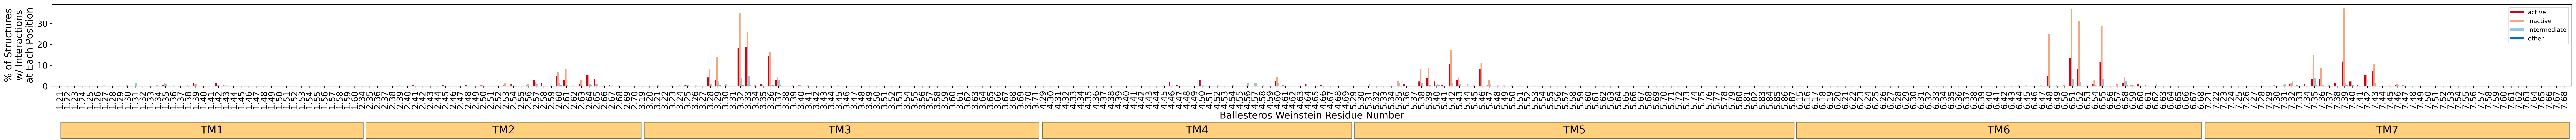

In [27]:
# 60 x 3 interaction % plot for PPT
matplotlib.rcParams['figure.figsize'] = [60, 3] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)

width = 0.20  # the width of the bars

fig, ax = plt.subplots()

active_int_count_percs = []
inactive_int_count_percs = []
intermediate_int_count_percs = []
other_int_count_percs = []

for x in active_int_counts:
    active_int_count_percs.append((x/364)*100)
    
for x in inactive_int_counts:
    inactive_int_count_percs.append((x/364)*100)

for x in intermediate_int_counts:
    intermediate_int_count_percs.append((x/364)*100)

for x in other_int_counts:
    other_int_count_percs.append((x/364)*100)

x = np.arange(len(resnums))

# create rectangles for bar plot
rects1 = ax.bar(x - (width*1.5), active_int_count_percs, width, label=resnums, color = '#ca0020')
rects2 = ax.bar(x - (width/2), inactive_int_count_percs, width, label=resnums, color = '#f4a582')
rects3 = ax.bar(x + (width/2), intermediate_int_count_percs, width, label=resnums, color = '#92c5de')
rects4 = ax.bar(x + (width*1.5), other_int_count_percs, width, label=resnums, color = '#0571b0')

# Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
ax.set_ylabel('% of Structures\nw/ Interactions\nat Each Position', fontsize = 16)
ax.set_xlabel('Ballesteros Weinstein Residue Number', fontsize = 16)
ax.set_xticks(x)
ax.set_xticklabels(resnums, rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)

# Add Legend
custom_lines = [Line2D([0], [0], color='#ca0020', lw=4),
                Line2D([0], [0], color='#f4a582', lw=4),
                Line2D([0], [0], color='#92c5de', lw=4),
                Line2D([0], [0], color='#0571b0', lw=4)]

ax.legend(custom_lines, ['active', 'inactive', 'intermediate', 'other'])


#ax.set_ylim([0, 100])
fig.tight_layout()

# add TM labels
plt.figtext(0.083, -0.05, "                                        TM1                                        ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.196, -0.05, "                                    TM2                                    ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.327, -0.05, "                                                     TM3                                                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.4648, -0.05, "                                         TM4                                         ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.611, -0.05, "                                                            TM5                                                            ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.7755, -0.05, "                                                       TM6                                                       ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.926, -0.05, "                                                 TM7                                                 ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})


# stop leftmost bar from crowding x axis
plt.xlim([-1,len(resnums)])
plt.show()

fig.savefig('364_activationstate_perc_plot_60x3.jpg', bbox_inches='tight')

---
## Interactions by Ligand Function

In [29]:
df.Function.unique()

array(['Agonist', 'Antagonist', 'Agonist (partial)', 'Inverse agonist',
       'PAM'], dtype=object)

In [30]:
# make subset dataframes that separate the data by ligand function
agonist_df = df.loc[df['Function'] == 'Agonist']
antagonist_df = df.loc[df['Function'] == 'Antagonist']
p_agonist_df = df.loc[df['Function'] == 'Agonist (partial)']
inv_agonist_df = df.loc[df['Function'] == 'Inverse agonist']
PAM_df = df.loc[df['Function'] == 'PAM']

In [32]:
resnums, agonist_int_counts = get_ints(agonist_df)
resnums, antagonist_int_counts = get_ints(antagonist_df)
resnums, p_agonist_int_counts = get_ints(p_agonist_df)
resnums, inv_agonist_int_counts = get_ints(inv_agonist_df)
resnums, PAM_int_counts = get_ints(PAM_df)

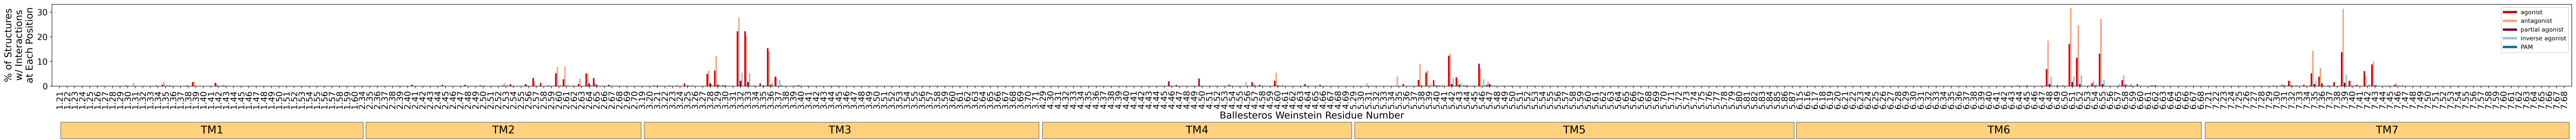

In [36]:
# 60 x 3 interaction % plot for PPT
matplotlib.rcParams['figure.figsize'] = [60, 3] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)

width = 0.20  # the width of the bars

fig, ax = plt.subplots()

agonist_int_count_percs = []
antagonist_int_count_percs = []
p_agonist_int_count_percs = []
inv_agonist_int_count_percs = []
PAM_int_count_percs = []

for x in agonist_int_counts:
    agonist_int_count_percs.append((x/364)*100)
    
for x in antagonist_int_counts:
    antagonist_int_count_percs.append((x/364)*100)

for x in p_agonist_int_counts:
    p_agonist_int_count_percs.append((x/364)*100)

for x in inv_agonist_int_counts:
    inv_agonist_int_count_percs.append((x/364)*100)

for x in PAM_int_counts:
    PAM_int_count_percs.append((x/364)*100)

x = np.arange(len(resnums))

# create rectangles for bar plot
rects1 = ax.bar(x - (width*2), agonist_int_count_percs, width, label=resnums, color = '#ca0020')
rects2 = ax.bar(x - (width), antagonist_int_count_percs, width, label=resnums, color = '#f4a582')
rects3 = ax.bar(x, p_agonist_int_count_percs, width, label=resnums, color = '#730337')
rects4 = ax.bar(x + (width), inv_agonist_int_count_percs, width, label=resnums, color = '#92c5de')
rects5 = ax.bar(x + (width*2), PAM_int_count_percs, width, label=resnums, color = '#0571b0')

# Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
ax.set_ylabel('% of Structures\nw/ Interactions\nat Each Position', fontsize = 16)
ax.set_xlabel('Ballesteros Weinstein Residue Number', fontsize = 16)
ax.set_xticks(x)
ax.set_xticklabels(resnums, rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)

# Add Legend
custom_lines = [Line2D([0], [0], color='#ca0020', lw=4),
                Line2D([0], [0], color='#f4a582', lw=4),
                Line2D([0], [0], color='#730337', lw=4),
                Line2D([0], [0], color='#92c5de', lw=4),
                Line2D([0], [0], color='#0571b0', lw=4)]

ax.legend(custom_lines, ['agonist', 'antagonist', 'partial agonist', 'inverse agonist', 'PAM'])


#ax.set_ylim([0, 100])
fig.tight_layout()

# add TM labels
plt.figtext(0.083, -0.05, "                                        TM1                                        ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.196, -0.05, "                                    TM2                                    ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.327, -0.05, "                                                     TM3                                                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.4648, -0.05, "                                         TM4                                         ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.611, -0.05, "                                                            TM5                                                            ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.7755, -0.05, "                                                       TM6                                                       ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.926, -0.05, "                                                 TM7                                                 ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})


# stop leftmost bar from crowding x axis
plt.xlim([-1,len(resnums)])
plt.show()

fig.savefig('364_ligandfunction_perc_plot_60x3.jpg', bbox_inches='tight')

---
## Residue Positions vs. Interaction Energies

In [37]:
display(df)

,index,PDBID,State,Function,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,...,7.67_intenergysum,7.67_inttype1,7.67_intenergy1,7.67_inttype2,7.67_intenergy2,7.68_intenergysum,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2
0,1,7EW2,Active,Agonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
1,2,7EW3,Active,Agonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
2,3,7EW4,Active,Agonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
3,4,7EW1,Active,Agonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
4,5,7LD4,Active,Agonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,387,5C1M,Active,Agonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
360,388,4EJ4,Inactive,Antagonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
361,389,4DKL,Inactive,Antagonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999
362,390,6Z10,Intermediate,Antagonist,-999,NaN,-999,NaN,-999,-999,...,-999,NaN,-999,NaN,-999,-999,NaN,-999,NaN,-999


In [162]:
# find residues where interactions are made
from statistics import stdev

def get_intenergies(df):
    # get columns with 'sum' in their name
    energysum_cols = [col for col in df.columns if 'intenergysum' in col]

    # create empty lists for column counts and residue numbers
    res_avgenergies = []
    res_stdevs = []
    resnums = []

    # loop through sum columns and count interactions that don't have -999 energies
    for col in energysum_cols:
        resnum = col[:4]
        resnums.append(resnum)
        energies = [x for x in list(df[col]) if x != -999]
        
        # calculate average of all interaction energies at residue position resnum.
        # this average only takes into account structures with interactions
        if len(energies) == 0:
            avg = 0
        else:
            avg = sum(energies)/len(energies)
        res_avgenergies.append(avg)
        
        # calculate stdev of all interaction energies at residue position resnum
        if len(energies) <= 1:
            res_stdevs.append(0)
        else:
            res_stdevs.append(stdev(energies))
            
#         if len(energies) == 1:
#             print(resnum, avg, 0)
#         elif len(energies) > 1:
#             print(resnum, avg, stdev(energies), [energies])
        
    return resnums, res_avgenergies, res_stdevs

In [163]:
resnums, res_avgenergies, res_stdevs = get_intenergies(df)

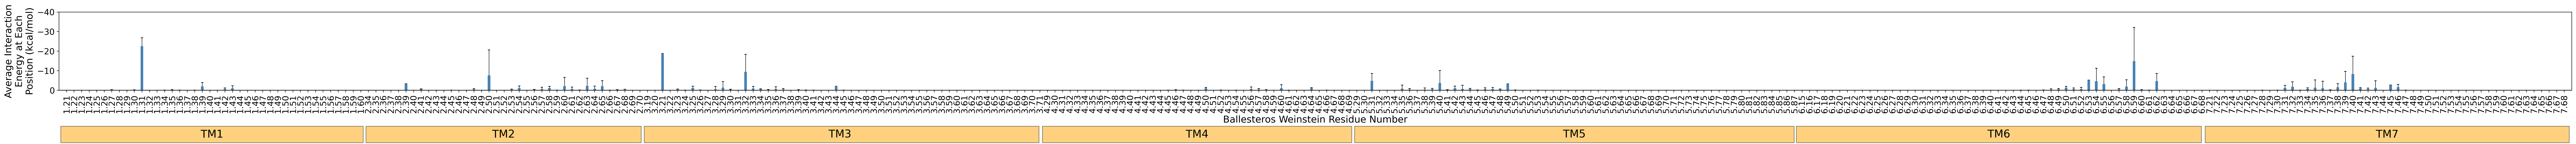

In [164]:
# 60 x 3 plot for PPT
matplotlib.rcParams['figure.figsize'] = [60, 3] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)

x = np.arange(len(resnums))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# create rectangles for bar plot
rects = ax.bar(resnums, res_avgenergies, width, label=resnums, color = 'steelblue')

# get indices of residues with non-zero error
nonzero_error_idxs = []

for error in res_stdevs:
    if error != 0:
        nonzero_error_idxs.append(res_stdevs.index(error))

# error bars for stdevs
# res_stdevs = [-999 if item == 0 else item for item in res_stdevs]
plt.errorbar(resnums, res_avgenergies, yerr=res_stdevs, fmt="none", color="black", capsize = 2.0, elinewidth = 0.75, zorder=0)

# Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
ax.set_ylabel('Average Interaction\nEnergy at Each\nPosition (kcal/mol)', fontsize = 16)
ax.set_xlabel('Ballesteros Weinstein Residue Number', fontsize = 16)
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)

#set y axis limits and add a horizontal line at y = 0
#ax.set_ylim([10, -40])
ax.set_ylim([0, -40])
plt.axhline(y=0, color='black', linestyle='-', linewidth = 1)
plt.axvline(x=-1, color='black', linestyle='-', linewidth = 1)

fig.tight_layout()

# add TM labels
plt.figtext(0.083, -0.05, "                                        TM1                                        ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.196, -0.05, "                                    TM2                                    ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.327, -0.05, "                                                     TM3                                                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.4648, -0.05, "                                         TM4                                         ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.611, -0.05, "                                                            TM5                                                            ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.7755, -0.05, "                                                       TM6                                                       ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.926, -0.05, "                                                 TM7                                                 ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# stop leftmost bar from crowding x axis
plt.xlim([-1,len(resnums)])
plt.show()

#fig.savefig('364_int_energy_plot_60x3.jpg', bbox_inches='tight')

In [165]:
res_stdevs[resnums.index('1.30')]

0.07071067811865475

---
## Residue Positions vs. Interaction Energies (means include cases where no interaction is made)

In [170]:
# find residues where interactions are made
from statistics import stdev

def get_intenergies(df):
    # get columns with 'sum' in their name
    energysum_cols = [col for col in df.columns if 'intenergysum' in col]

    # create empty lists for column counts and residue numbers
    res_avgenergies = []
    res_stdevs = []
    resnums = []

    # loop through sum columns and count interactions that don't have -999 energies
    for col in energysum_cols:
        resnum = col[:4]
        resnums.append(resnum)
        energies = list(df[col])
        energies = [0 if item == -999 else item for item in energies]
        
        # calculate average of all interaction energies at residue position resnum.
        # this average takes into account ALL structures with interactions
        if len(energies) == 0:
            avg = 0
        else:
            avg = sum(energies)/len(resnums)
        res_avgenergies.append(avg)
        
        # calculate stdev of all interaction energies at residue position resnum
        if len(energies) <= 1:
            res_stdevs.append(0)
        else:
            res_stdevs.append(stdev(energies))
            
#         if len(energies) == 1:
#             print(resnum, avg, 0)
#         elif len(energies) > 1:
#             print(resnum, avg, stdev(energies), [energies])
        
    return resnums, res_avgenergies, res_stdevs

In [171]:
resnums, res_avgenergies, res_stdevs = get_intenergies(df)

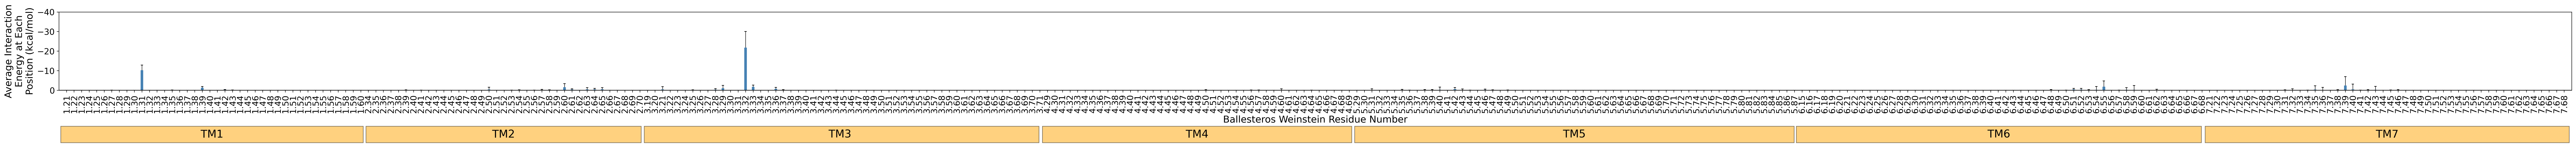

In [172]:
# 60 x 3 plot for PPT
matplotlib.rcParams['figure.figsize'] = [60, 3] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)

x = np.arange(len(resnums))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# create rectangles for bar plot
rects = ax.bar(resnums, res_avgenergies, width, label=resnums, color = 'steelblue')

# get indices of residues with non-zero error
nonzero_error_idxs = []

for error in res_stdevs:
    if error != 0:
        nonzero_error_idxs.append(res_stdevs.index(error))

# error bars for stdevs
# res_stdevs = [-999 if item == 0 else item for item in res_stdevs]
plt.errorbar(resnums, res_avgenergies, yerr=res_stdevs, fmt="none", color="black", capsize = 2.0, elinewidth = 0.75, zorder=0)

# Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
ax.set_ylabel('Average Interaction\nEnergy at Each\nPosition (kcal/mol)', fontsize = 16)
ax.set_xlabel('Ballesteros Weinstein Residue Number', fontsize = 16)
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)

#set y axis limits and add a horizontal line at y = 0
#ax.set_ylim([10, -40])
ax.set_ylim([0, -40])
plt.axhline(y=0, color='black', linestyle='-', linewidth = 1)
plt.axvline(x=-1, color='black', linestyle='-', linewidth = 1)

fig.tight_layout()

# add TM labels
plt.figtext(0.083, -0.05, "                                        TM1                                        ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.196, -0.05, "                                    TM2                                    ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.327, -0.05, "                                                     TM3                                                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.4648, -0.05, "                                         TM4                                         ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.611, -0.05, "                                                            TM5                                                            ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.7755, -0.05, "                                                       TM6                                                       ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.926, -0.05, "                                                 TM7                                                 ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# stop leftmost bar from crowding x axis
plt.xlim([-1,len(resnums)])
plt.show()

fig.savefig('364_int_energy_plot_60x3_ALL.jpg', bbox_inches='tight')